In [1]:
!pip install --user 'nifty8[re]'

  Obtaining dependency information for nifty8[re] from https://files.pythonhosted.org/packages/ef/05/0471cfe50323102d3ad815a7067edd6eb96822d29baa223be13c9bae7caf/nifty8-8.5-py3-none-any.whl.metadata
  Obtaining dependency information for jax from https://files.pythonhosted.org/packages/35/c1/51a51ea646864ef8b4bd68632162ed1b4495c580b9bfa72fe49168221d69/jax-0.4.24-py3-none-any.whl.metadata
  Obtaining dependency information for jaxlib from https://files.pythonhosted.org/packages/d0/0d/e491ffde223cb33de923e31fdceab8e5881f363806ff54dc6c91e56d1518/jaxlib-0.4.24-cp311-cp311-manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for ml-dtypes>=0.2.0 from https://files.pythonhosted.org/packages/77/a0/d4ee9e3aca5b9101c590b58555820618e8201c2ccb7004eabb417ec046ac/ml_dtypes-0.3.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 9.8 

In [4]:
import pandas as pd 
import numpy as np
import nifty8 as ift
import matplotlib.pyplot as plt
import random

In [16]:
db = pd.read_csv('/home/astro/Documents/GitHub/ALMASim/metadata/LU_metadata.csv')
db = db[db['Mosaic'] != 'mosaic']
metadata = db[['RA', 'Dec', 'Band', 'Ang.res.', 'FOV', 'Int.Time', 'Obs.date', 'PWV']]
metadata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7797 entries, 0 to 7796
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RA        7797 non-null   float64
 1   Dec       7797 non-null   float64
 2   Band      7797 non-null   int64  
 3   Ang.res.  7797 non-null   float64
 4   FOV       7797 non-null   float64
 5   Int.Time  7797 non-null   float64
 6   Obs.date  7797 non-null   object 
 7   PWV       7797 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 548.2+ KB


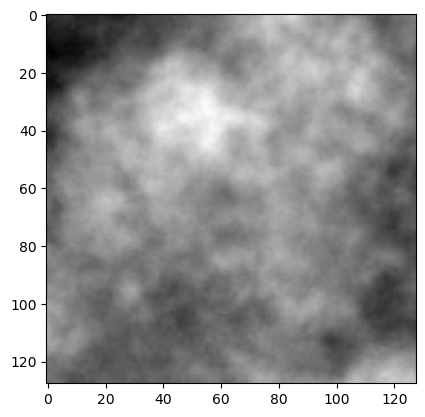

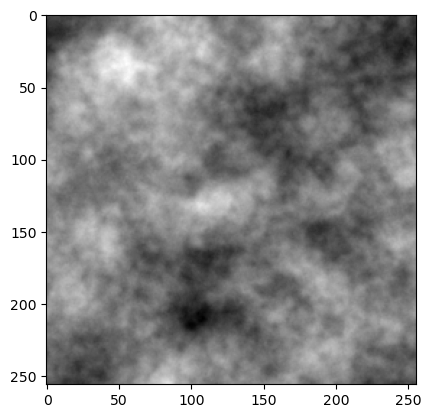

In [37]:
n_px = 128
ift.random.push_sseq(random.randint(1, 1000))
space = ift.RGSpace((2*n_px, 2*n_px))
args = {
        'offset_mean': 24,
        'offset_std': (1, 0.1),
        'fluctuations': (5., 1.),
        'loglogavgslope': (-3.5, 0.5),
        'flexibility': (1.2, 0.4),
        'asperity': (0.2, 0.2)    
    }

cf = ift.SimpleCorrelatedField(space, **args)
exp_cf = ift.exp(cf)
random_pos = ift.from_random(exp_cf.domain)
sample = exp_cf(random_pos)
data_2 = np.log(sample.val[:, :])
data = np.log(sample.val[0:n_px, 0:n_px])
# BEGIN: Normalize data between 0 and 1
normalized_data = (data - np.min(data)) / (np.max(data) - np.min(data))
normalized_data_2 = (data_2 - np.min(data_2)) / (np.max(data_2) - np.min(data_2))
# END: Normalize data between 0 and 1

plt.imshow(normalized_data, cmap='gray')
plt.show()
plt.imshow(normalized_data_2, cmap='gray')
plt.show()